In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:
# carregar ficheiro para o dataframe
df_exames = pd.read_csv('./datasets/1698696961761-attachment.csv')

In [12]:
# visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [13]:
# apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [14]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [15]:
# remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [16]:
# converter uma variavel categorica (Genero) em numerica, usando One-hot encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [17]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

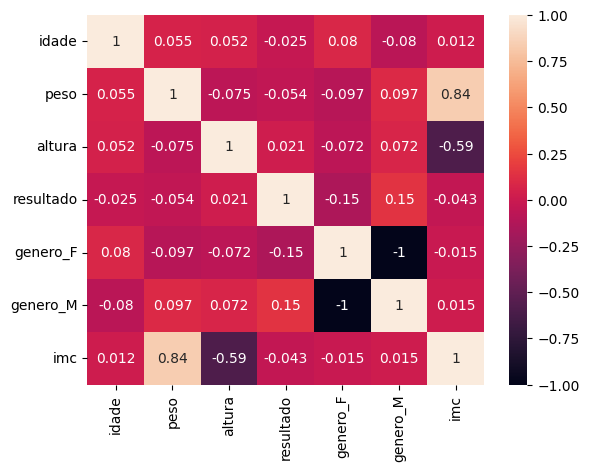

In [36]:
# Apresentar mapa de calor com correlacao entre as variaveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

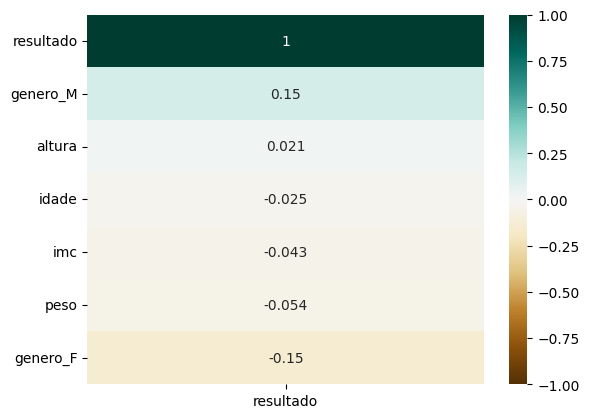

In [35]:
#mapa de correlacao so com a variavel target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


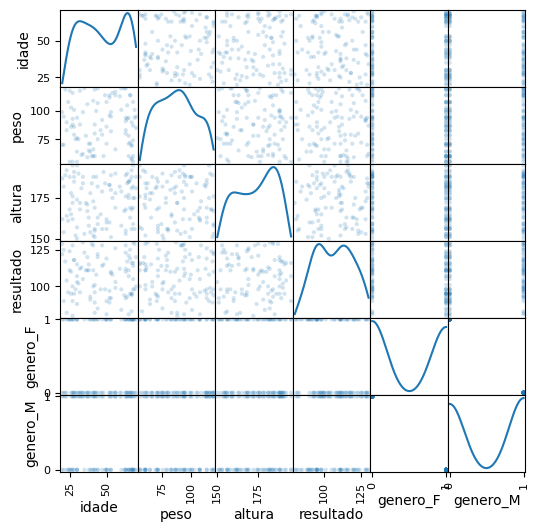

In [27]:
# plot de scatter (dispersao) com distribuicao
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6),diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

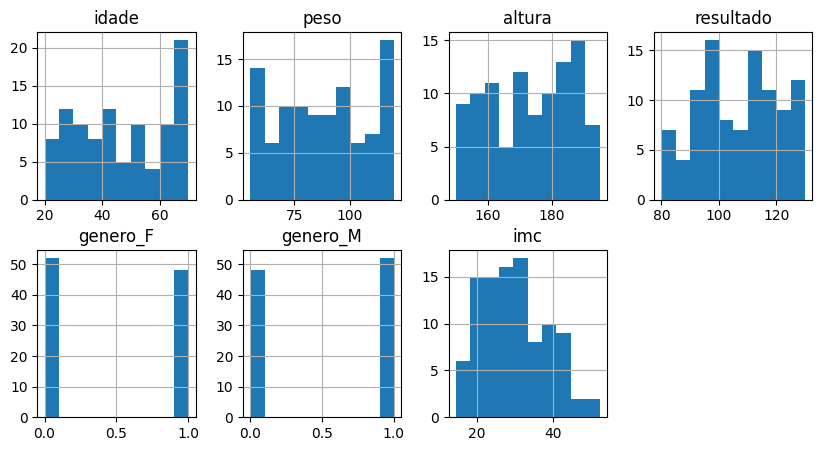

In [38]:
# histograma de todas as variaveis
df_exames.hist(layout=(2,4), figsize=(10,5))

In [32]:
# criar uma feature nova
# IMC (indice de massa corporal)
# IMC = peso / altura ^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))

In [33]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [34]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [40]:
dict_regressao = {'tempo_casa': [1, 3, 6, 9, 10, 14, 18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}

In [41]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

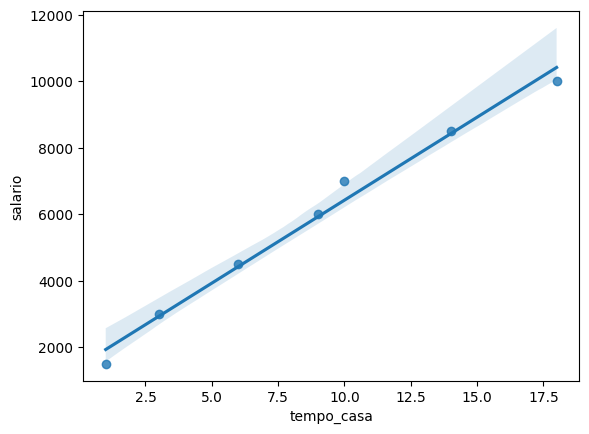

In [42]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')